## Import Packages

In [2]:
import pandas as pd
from googlesearch import search 
from tqdm import tqdm_notebook as tqdm
import random
import requests
from bs4 import BeautifulSoup
from time import sleep
from os import listdir
from os.path import isfile, join
import bs4 as bs
import re

## Import County Data

In [3]:
county_data = pd.read_csv('./us-counties.csv')

## Data Manipulation

In [4]:
# create a concatenated county state column
county_data['county_state'] = county_data['county'] + ' ' + county_data['state']

In [5]:
# create a new dataframe containing only unique county state combinations
county_state = pd.DataFrame(county_data['county_state'].unique(), columns=['county_state'])

## Google Search

In [10]:
# perform google search for links to scrape


for cs in tqdm(county_state['county_state']):
    wait_time = random.randint(1,3)
    search_string = cs + ' + Wiki'
    
    this_list = list(search(search_string, tld="com", num=1, stop=1, pause=wait_time))
    
    county_state.loc[county_state['county_state'] == cs, 'Wiki Link 1'] = this_list[0]
#     county_state.loc[county_state['county_state'] == cs, 'Wiki Link 2'] = this_list[1]
    
    search_string2 = cs + ' + demographics + worldpopulationreview'
    demogs = list(search(search_string2, tld="com", num=1, stop=1, pause=wait_time))
    
    county_state.loc[county_state['county_state'] == cs, 'Demogs Link 1'] = demogs[0]
#     county_state.loc[county_state['county_state'] == cs, 'Demogs Link 2'] = demogs[1]
    
county_state.to_csv('./county_state.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


## Website Scraping from Wiki

In [43]:
# scrape page from the wiki website
i = 0
for link in tqdm(county_state['Wiki Link 1']):
    res = requests.get(link)
    item_id = county_state.iloc[i]['county_state']
    i = i + 1
    file_name = '/Volumes/GoogleDrive/My Drive/CountyData/{}.htm'.format(item_id)
    # open file and write page content
    with open(file_name,'wb') as open_file:
        open_file.write(res.content)
        open_file.close()
    # delay 2 seconds for next page request
    sleep(2)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [11]:
# scrape list from the website
i = 0
for link in tqdm(county_state['Demogs Link 1']):
    res = requests.get(link)
    item_id = county_state.iloc[i]['county_state']
    i = i + 1
    file_name = '/Volumes/GoogleDrive/My Drive/CountyDataDemogs/{}.htm'.format(item_id)
    # open file and write page content
    with open(file_name,'wb') as open_file:
        open_file.write(res.content)
        open_file.close()
    # delay 2 seconds for next page request
    sleep(2)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


## Extracting Information

In [12]:
# get all files from path
mypath = '/Volumes/GoogleDrive/My Drive/CountyData/'
files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [13]:
unfinished_files = []
for file in tqdm(files):
    with open('{}/{}'.format(mypath, file), 'r') as open_file:
        soup = bs.BeautifulSoup(open_file, 'html.parser')
        cs_name = file.strip('.htm')
        try:
            density = re.findall('(?!Density)[\d,.]+(?=\/sq)', soup.find('table', {'class': 'infobox'}).get_text())
        except: 
            print(file)
            density = None
        
#         print(cs_name)
        try: 
            county_state.loc[county_state['county_state'] == cs_name, 'Density'] = density
        except:
            unfinished_files.append(file)
            print(cs_name, density)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Washington Oregon []
Unknown Rhode Island.htm
Bergen New Jersey.htm
Jefferson Colorado []
Washoe Nevada []
Honolulu Hawaii ['5,791', '4,700']
Wayne Pennsylvania []
Clark Washington []
St. Johns Florida.htm
Howard Indiana []
Johnson Indiana []
Island Washington.htm
Montgomery Kentucky []
Albany New York ['4,587.20', '180']
San Benito California []
Clear Creek Colorado []
Pearl River Mississippi []
Ocean New Jersey.htm
Unknown Puerto Rico.htm
El Paso Texas []
Travis Texas []
Grant Washington.htm
Graham Arizona []
Mesa Colorado []
Woodford Illinois []
Bourbon Kentucky.htm
Bristol Massachusetts.htm
Unknown Virgin Islands.htm
Baker Florida []
Unknown Guam.htm
Payne Oklahoma []
Lehigh Pennsylvania []
Lewis Washington []
Lincoln Washington []
Cleveland Arkansas []
Desha Arkansas []
Lake Florida []
Unknown Maine.htm
Unknown Massachusetts.htm
Durham North Carolina []
Matagorda Texas.htm
Lake Indiana.htm
Martin Minnesota []
Gloucester New Jersey.htm
Clinton New York.htm
Iredell North Carolina []

In [6]:
mypath = '/Volumes/GoogleDrive/My Drive/CountyDataDemogs/'
files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [7]:
all_list = {}
for file in tqdm(files):
    cs_name = file.strip('.htm')
    sample_dict = {}
    with open('{}{}'.format(mypath,file), 'r') as open_file:
        soup = bs.BeautifulSoup(open_file, 'html.parser')
        try:
            population = soup.find(class_='HowManyPeople__StyledHMP-xzf4b-0').find('span').get_text()
        except:
            population = None
        try: 
            median_age = soup.find(class_='MedianAge__StyledMedianAge-wsd6zy-0').find('div').find('div').find('p').get_text()
        except:
            median_age = None
        
        try:
            pop_female = soup.find(class_='SexRatio__StyledSexRow-chhu46-1').find_all('p')[2].get_text()
        except:
            pop_female = None
            
        try:
            pop_male = soup.find_all(class_='SexRatio__StyledSexRow-chhu46-1')[1].find_all('p')[2].get_text()
        except:
            pop_male = None
            
#         sample_dict[file]['State County'] = file.strip('.htm')
        sample_dict['Population'] = [population]
        sample_dict['Median Age'] = [median_age]
        sample_dict['Female Population Percent'] = [pop_female]
        sample_dict['Male Population Percent'] = [pop_male]
        
        for i in soup.find_all(class_='SidebarRowDiv__StyledRow-llp1s-0'):
            label = i.find(class_='rowlabel').get_text()
            value = i.find(class_='rowvalue').get_text()
            label_check = [x for x in county_data['state'].unique() if x in label]
            if len(label_check) > 0:
                label = label.replace(label_check[0], 'State')
            sample_dict[label] = [value]

        for i in soup.find_all(class_='ValueRow__StyledValueRow-jn3gri-0'):
            text = i.get_text()
            if '%' in text:
                try:
                    value = text.split('%')[0]
                    label = text.split('%')[1]
                except:
                    print(text)
                    continue
            elif '$' in text:
                try:
                    value = re.findall('[\d,]+', text)[0]
                    label = re.findall('(?![$\d,]+)[ \w]+', text)[0]
                except:
                    print(text)
                    continue
            else:
                try:
                    value = re.findall('[\d.]+', text)[0]
                    label = re.findall('[A-Za-z ]+', text)[0]
                except:
                    print(text)
                    continue
            label_check = [x for x in county_data['state'].unique() if x in label]
            if len(label_check) > 0:
                label = label.replace(label_check[0], 'State')
            sample_dict[label] = [value]

        for i in soup.find_all(class_='ValueRowLarge__StyledValueRow-sc-1dpjgf4-0'):
            text = i.get_text()
            if '%' in text:
                try:
                    value = text.split('%')[0]
                    label = text.split('%')[1]
                except:
                    print(text)
                    continue
            elif '$' in text:
                try:
                    value = re.findall('[\d,]+', text)[0]
                    label = re.findall('(?![$\d,]+)[ \w]+', text)[0]
                except:
                    print(text)
                    continue
            else:
                try:
                    value = re.findall('[\d.]+', text)[0]
                    label = re.findall('[A-Za-z ]+', text)[0]
                except:
                    print(text)
                    continue
            label_check = [x for x in county_data['state'].unique() if x in label]
            if len(label_check) > 0:
                label = label.replace(label_check[0], 'State')
            sample_dict[label] = [value]
        all_list[cs_name] = sample_dict 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Female Veterans 
$Average Male 
Number of Veterans 
Male Veterans 
Female Veterans 
Female Veterans 
Female Veterans 
Female Veterans 
Female Veterans 
Female Veterans 
Female Veterans 
$Average Female 
Female Veterans 
$Average Female 
Female Veterans 
Female Veterans 
Female Veterans 
Female Veterans 
Female Veterans 
$Average Male 
Female Veterans 
Female Veterans 
Female Veterans 
Female Veterans 
Female Veterans 
Female Veterans 
$Average Female 
Female Veterans 
Female Veterans 
Female Veterans 
Female Veterans 
Female Veterans 
Female Veterans 
Female Veterans 
Female Veterans 
Female Veterans 
Female Veterans 
Female Veterans 
$Average Female 
$Average Male 
$Average Female 
Female Veterans 
Female Veterans 
Female Veterans 
Female Veterans 
Female Veterans 
Female Veterans 
Female Veterans 
Female Veterans 
Female Veterans 
Female Veterans 
Female Veterans 
Female Veterans 
Female Veterans 
Female Veterans 
$Average Male 
$Average Female 
Female Veterans 
Female Veterans 
Fema

## Aggregating List into Dataframe

In [8]:
main_df = pd.DataFrame()
for key in tqdm(all_list.keys()):
    temp_df = pd.DataFrame(all_list[key])
    temp_df['State County'] = key
    main_df = main_df.append(temp_df)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [11]:
county_state

0        Snohomish Washington
1        Snohomish Washington
2        Snohomish Washington
3               Cook Illinois
4        Snohomish Washington
                 ...         
19708        Sheridan Wyoming
19709        Sublette Wyoming
19710      Sweetwater Wyoming
19711           Teton Wyoming
19712        Washakie Wyoming
Name: county_state, Length: 19713, dtype: object

In [12]:
county_data['state'].unique()

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia', 'Northern Mariana Islands'], dtype=object)

In [13]:
na_breakdown = (main_df.isnull().sum() / main_df.shape[0] * 100).reset_index()

In [14]:
na_breakdown = na_breakdown.sort_values(0, ascending=False).reset_index(drop= True)

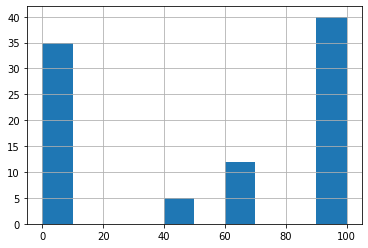

In [15]:
na_breakdown[0].hist()

In [16]:
appended_county_data = county_data.merge(main_df, left_on='county_state', right_on='State County', how='left')

In [17]:
appended_county_data = appended_county_data.reset_index()

NameError: name 'appended_county_data' is not defined

In [18]:
appended_county_data.to_csv('./appended_us-counties.csv', index=False)

## Scratch Area

In [276]:
with open('{}{}'.format(mypath,files[0]), 'r') as open_file:
        soup = bs.BeautifulSoup(open_file, 'html.parser')

In [318]:
for i in soup.find_all(class_='ValueRowLarge__StyledValueRow-sc-1dpjgf4-0'):
    text = i.get_text()
    if '%' in text:
        try:
            value = text.split('%')[0]
            label = text.split('%')[1]
        except:
            print(text)
            continue
    elif '$' in text:
        try:
            value = re.findall('[\d,]+', text)[0]
            label = re.findall('(?![$\d,]+)[ \w]+', text)[0]
        except:
            print(text)
            continue
    else:
        try:
            value = re.findall('[\d.]+', text)[0]
            label = re.findall('[A-Za-z ]+', text)[0]
#             print(text)
        except:
            print(text)
            continue
    label_check = [x for x in county_data['state'].unique() if x in label]
    if len(label_check) > 0:
        label = label.replace(label_check[0], 'State')


Born in State 


In [105]:
sample_dict

{'Age Dependency Ratio ': ['63.1'],
 'Old Age Dependency Ratio ': ['23.5', 32],
 'Child Dependency Ratio ': ['39.6'],
 'Average Family Size ': ['3.09'],
 'Average Household Size ': ['2.45'],
 'Unmarried (Opposite Sex) ': ['4.5'],
 'Unmarried (Same Sex) ': ['0']}

In [121]:
pd.DataFrame.from_dict(sample_dict, orient='index').reset_index()

,index,0
0,Age Dependency Ratio,63.1
1,Old Age Dependency Ratio,23.5
2,Child Dependency Ratio,39.6
3,Average Family Size,3.09
4,Average Household Size,2.45
5,Unmarried (Opposite Sex),4.5
6,Unmarried (Same Sex),0
7,Rate of Home Ownership,51.7
8,Average Earnings,"42,870"
9,Average Male,"54,894"


In [119]:
for i in soup.find_all(class_='liMQHN'):
    text = i.get_text()
    if '%' in text:
        value = text.split('%')[0]
        label = text.split('%')[1]
    elif '$' in text:
        value = re.findall('[\d,]+', text)[0]
        label = re.findall('(?![$\d,]+)[ \w]+', text)[0]
    else:
        value = re.findall('[\d]+[.[\d]+]?', text)[0]
        label = re.findall('(?![\d.]+)[ \w]+', text)[0]
    print(i.get_text())
    try:
        sample_dict[label] = [value]
    except: 
        sample_dict[label].append(value)
    print(value, label)

51.7%Rate of Home Ownership 
51.7 Rate of Home Ownership 
$42,870Average Earnings 
42,870 Average Earnings 
$54,894Average Male 
54,894 Average Male 
$34,500Average Female 
34,500 Average Female 
10.63%Overall Poverty Rate 
10.63 Overall Poverty Rate 
9.64%Male Poverty Rate 
9.64 Male Poverty Rate 
11.45%Female Poverty Rate 
11.45 Female Poverty Rate 
46.8%Overall Marriage Rate 
46.8 Overall Marriage Rate 
52.3%Male Marriage Rate 
52.3 Male Marriage Rate 
42.3%Female Marriage Rate 
42.3 Female Marriage Rate 
713Number of Veterans 
713 Number of Veterans 
690Male Veterans 
690 Male Veterans 
23Female Veterans 
23 Female Veterans 
5.16%Veteran Poverty Rate 
5.16 Veteran Poverty Rate 
25.97%Veteran Disability Rate 
25.97 Veteran Disability Rate 
67.2%Labor Force Participation 
67.2 Labor Force Participation 
64.2%Employment Rate 
64.2 Employment Rate 
4.2%Unemployment Rate 
4.2 Unemployment Rate 
58.90%Born in Washington 
58.90 Born in Washington 
92.37%Native Born 
92.37 Native Born 
7.6

In [120]:
sample_dict

{'Age Dependency Ratio ': ['63.1'],
 'Old Age Dependency Ratio ': ['23.5'],
 'Child Dependency Ratio ': ['39.6'],
 'Average Family Size ': ['3.09'],
 'Average Household Size ': ['2.45'],
 'Unmarried (Opposite Sex) ': ['4.5'],
 'Unmarried (Same Sex) ': ['0'],
 'Rate of Home Ownership ': ['51.7'],
 'Average Earnings ': ['42,870'],
 'Average Male ': ['54,894'],
 'Average Female ': ['34,500'],
 'Overall Poverty Rate ': ['10.63'],
 'Male Poverty Rate ': ['9.64'],
 'Female Poverty Rate ': ['11.45'],
 'Overall Marriage Rate ': ['46.8'],
 'Male Marriage Rate ': ['52.3'],
 'Female Marriage Rate ': ['42.3'],
 'Number of Veterans ': ['713'],
 'Male Veterans ': ['690'],
 'Female Veterans ': ['23'],
 'Veteran Poverty Rate ': ['5.16'],
 'Veteran Disability Rate ': ['25.97'],
 'Labor Force Participation ': ['67.2'],
 'Employment Rate ': ['64.2'],
 'Unemployment Rate ': ['4.2'],
 'Born in Washington ': ['58.90'],
 'Native Born ': ['92.37'],
 'Foreign Born ': ['7.63'],
 'Non Citizen ': ['4.63']}